In [111]:
import numpy as np
import pandas as pd

import pandas_profiling

In [165]:
titanicRawTrain = pd.read_csv('../data/raw/train.csv')

In [166]:
titanicRawTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [156]:
profile = pandas_profiling.ProfileReport(titanicRawTrain)
profile.to_file(outputfile="../reports/titanicRawTrain.html")

## Feature Tuning

In [157]:
from sklearn.preprocessing import OneHotEncoder

### One hot encoding of Sex

In [69]:
def simplify_sex(df):
    sex = pd.get_dummies(df.Sex, prefix = 'Sex')
    df = pd.concat([df, sex], axis = 1)
    return df

In [9]:
#Converts to binary
titanicRawTrain.Sex = (titanicRawTrain.Sex == 'male').astype(int)

/home/rob/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [11]:
titanicRawTrain['Male'] = (titanicRawTrain.Sex == 1).astype(int)

In [12]:
titanicRawTrain['Female'] = (titanicRawTrain.Sex == 0).astype(int)

In [13]:
## add to set
titanicRawNumericTrain = titanicRawTrain[['Fare','SibSp','Survived', 'Male', 'Female']]

In [14]:
titanicRawNumericTrain.head()

,Fare,SibSp,Survived,Male,Female
0,7.2500,1,0,1,0
1,71.2833,1,1,0,1
2,7.9250,0,1,0,1
3,53.1000,1,1,0,1
4,8.0500,0,0,1,0


### One hot encoding of Class

In [76]:
def simplify_class(df):
    new_class = pd.get_dummies(df.Pclass, prefix = 'Class')
    df = pd.concat([df, new_class], axis = 1)
    return df

In [15]:
titanicRawTrain['First'] = (titanicRawTrain.Pclass == 1).astype(int)

In [16]:
titanicRawTrain['Second'] = (titanicRawTrain.Pclass == 2).astype(int)

In [17]:
titanicRawTrain["Third"] = (titanicRawTrain.Pclass == 3).astype(int)

In [18]:
## add to set
titanicRawNumericTrain = titanicRawTrain[['Fare','SibSp','Survived', 'Male', 'Female', 'First', 'Second', 'Third']]
titanicRawNumericTrain.head()

,Fare,SibSp,Survived,Male,Female,First,Second,Third
0,7.2500,1,0,1,0,0,0,1
1,71.2833,1,1,0,1,1,0,0
2,7.9250,0,1,0,1,0,0,1
3,53.1000,1,1,0,1,1,0,0
4,8.0500,0,0,1,0,0,0,1


## One hot encoding of Departure

In [67]:
def simplify_embarked(df):
    embarked = pd.get_dummies(df.Embarked , prefix='Embarked' )
    df = pd.concat([df, embarked], axis=1)
    return df

In [19]:
embarked = pd.get_dummies(titanicRawTrain.Embarked , prefix='Embarked' )

In [20]:
titanicRawNumericTrain = pd.concat([titanicRawNumericTrain, embarked], axis=1)

In [21]:
titanicRawNumericTrain.head()

,Fare,SibSp,Survived,Male,Female,First,Second,Third,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,1,0,1,0,0,0,1,0,0,1
1,71.2833,1,1,0,1,1,0,0,1,0,0
2,7.9250,0,1,0,1,0,0,1,0,0,1
3,53.1000,1,1,0,1,1,0,0,0,0,1
4,8.0500,0,0,1,0,0,0,1,0,0,1


In [22]:
## Simplify Ages

In [164]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0,5,12,18,25,35,60,120)
    group_names = ['Unknown', 'Baby', 'Child', 
                   'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    df.Age = pd.cut(df.Age, bins, labels = group_names)
    ages = pd.get_dummies(df.Age, prefix = 'Age')
    df = pd.concat([df,ages], axis = 1)
    return df

In [89]:
simplify_ages(titanicRawTrain)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Student,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,Unknown,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Baby,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young Adult,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teenager,1,0,237736,30.0708,NaN,C


In [27]:
age = pd.get_dummies(titanicRawTrain.Age , prefix='Age' )
titanicRawNumericTrain = pd.concat([titanicRawNumericTrain, age], axis=1)

In [48]:
titanicRawNumericTrain.columns

Index(['Fare', 'SibSp', 'Survived', 'Male', 'Female', 'First', 'Second',
       'Third', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_Unknown',
       'Age_Baby', 'Age_Child', 'Age_Teenager', 'Age_Student',
       'Age_Young Adult', 'Age_Adult', 'Age_Senior'],
      dtype='object')

In [167]:
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Age', 'Embarked', 'Pclass', 'Sex', 'Cabin', 'Fare'], axis=1)

In [168]:
def execute_cleaning(df):
    df = simplify_ages(df)
    df = simplify_embarked(df)
    df = simplify_class(df)
    df = simplify_sex(df)
    df = drop_features(df)
    return df

In [169]:
titanicCleanTrain = execute_cleaning(titanicRawTrain)

In [170]:
titanicCleanTrain.head()

,PassengerId,Survived,SibSp,Parch,Age_Unknown,Age_Baby,Age_Child,Age_Teenager,Age_Student,Age_Young Adult,Age_Adult,Age_Senior,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
1,2,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
2,3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,4,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0
4,5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1


In [173]:
titanicCleanTrain.columns

Index(['PassengerId', 'Survived', 'SibSp', 'Parch', 'Age_Unknown', 'Age_Baby',
       'Age_Child', 'Age_Teenager', 'Age_Student', 'Age_Young Adult',
       'Age_Adult', 'Age_Senior', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Class_1', 'Class_2', 'Class_3', 'Sex_female', 'Sex_male'],
      dtype='object')

## Review Data

In [171]:
profile = pandas_profiling.ProfileReport(titanicRawNumericTrain)
profile.to_file(outputfile="../reports/titanicRawNumericTrain.html")

## Build Model

In [172]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [176]:
X_train, X_test, y_train, y_test = train_test_split(titanicCleanTrain[['SibSp', 'Parch', 'Age_Unknown', 'Age_Baby',
       'Age_Child', 'Age_Teenager', 'Age_Student', 'Age_Young Adult',
       'Age_Adult', 'Age_Senior', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Class_1', 'Class_2', 'Class_3', 'Sex_female', 'Sex_male']],
                                                   titanicRawNumericTrain.Survived, test_size = 0.4, random_state =0)

In [177]:
X_train.shape

(534, 18)

In [178]:
X_test.shape

(357, 18)

In [179]:
y_train.shape

(534,)

In [180]:
y_test.shape

(357,)

In [181]:
clf = linear_model.LogisticRegression().fit(X_train, y_train)

In [182]:
clf.score(X_test, y_test)

0.80392156862745101

In [183]:
scores = cross_val_score(clf, X_train, y_train, cv = 10)

In [184]:
scores

array([ 0.7962963 ,  0.81481481,  0.81481481,  0.75925926,  0.77777778,
        0.74074074,  0.8490566 ,  0.8490566 ,  0.80769231,  0.75      ])

## Investigate Learning Curve

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
from sklearn.model_selection import learning_curve

In [187]:
train_sizes, train_scores, test_scores = learning_curve(linear_model.LogisticRegression(),
                                        X_train, y_train, train_sizes = [50, 100, 150, 200, 250, 300, 350, 400], cv = 10)                 

In [188]:
train_sizes

array([ 50, 100, 150, 200, 250, 300, 350, 400])

In [189]:
train_scores
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_mean

array([ 0.92      ,  0.88      ,  0.872     ,  0.8425    ,  0.826     ,
        0.825     ,  0.82285714,  0.82625   ])

In [190]:
test_scores_mean = np.mean(test_scores, axis = 1)

In [191]:
train_scores.shape

(8, 10)

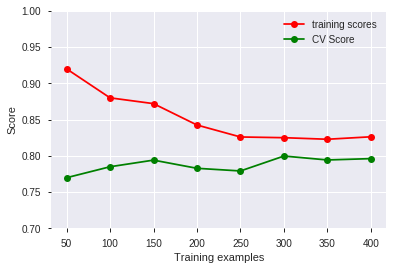

In [192]:
plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.5,1)
plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "training scores")
plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "CV Score")
plt.legend(loc="best")

## Test it out

In [193]:
titanicRawTest = pd.read_csv('../data/raw/test.csv')

In [194]:
data_test = execute_cleaning(titanicRawTest)
data_test.head()

,PassengerId,SibSp,Parch,Age_Unknown,Age_Baby,Age_Child,Age_Teenager,Age_Student,Age_Young Adult,Age_Adult,Age_Senior,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,892,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
1,893,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
2,894,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
3,895,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
4,896,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [196]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [197]:
output.to_csv('../models/titanic-predictions.csv', index = False)